# Laptop Price Prediction

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("LAPTOPDATA.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
# Drop the unnamed columns:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
data.shape

(1303, 11)

In [6]:
data.duplicated().sum()

29

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [10]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [11]:
data["Ram"]=data["Ram"].str.replace("GB",'')
data["Weight"]=data["Weight"].str.replace("kg",'')

In [12]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
# Changing the data type of the Ram and  weight columns:
data["Ram"]=data["Ram"].astype("int32")
data["Weight"]=data["Weight"].astype("float32")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [15]:
plt.style.use("ggplot")

# Perform EDA

In [16]:
d1=data.sort_values(by="Price",ascending=False).head()
d1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72
830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.72
610,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018.72
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.92
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00


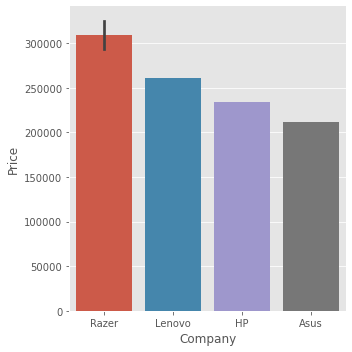

In [17]:
sns.catplot(x="Company",y="Price",data=d1,kind="bar")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

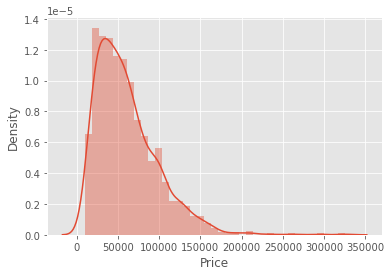

In [18]:
sns.distplot(data["Price"])

<AxesSubplot:>

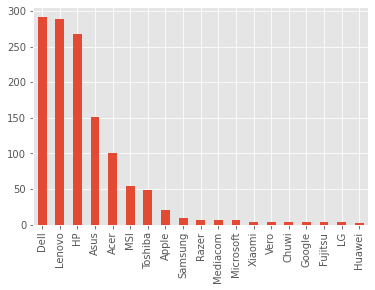

In [19]:
# The company which have the maximum sales.
data["Company"].value_counts().plot(kind="bar")

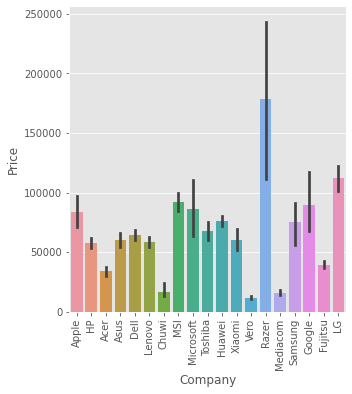

In [20]:
# Price of the laptop in different company.
sns.catplot(x="Company",y="Price",data=data,kind="bar")
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:>

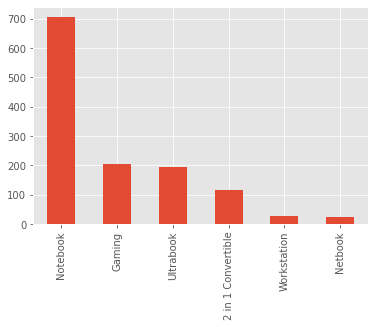

In [21]:
# Different type of laptops:
data["TypeName"].value_counts().plot(kind="bar")

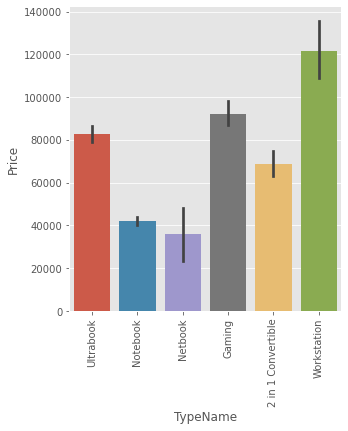

In [22]:
sns.catplot(x="TypeName",y="Price",data=data,kind="bar")
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

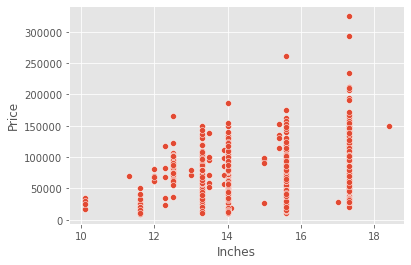

In [23]:
sns.scatterplot(x=data["Inches"],y=data["Price"])

In [24]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,62817.12
827,Dell,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,31168.80
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.72
1243,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,95850.72
1166,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,74059.20


In [25]:
data["Touchscreen"]=data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [26]:
data.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
309,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.86,24988.3200,0
971,Dell,Ultrabook,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,104587.5744,1
352,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,75071.5200,0
435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,90309.6000,0


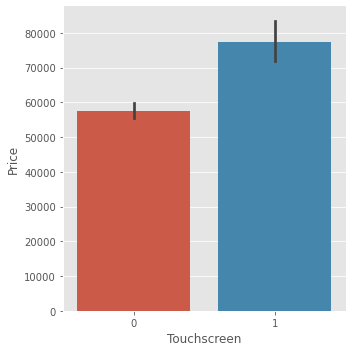

In [27]:
sns.catplot(x="Touchscreen",y="Price",data=data,kind="bar")

In [28]:
data["Ips"]=data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [29]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1253,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.90,57116.16,0,1
685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.60,0,0
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.72,1,1
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.12,0,1
1233,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85141.44,0,0


<AxesSubplot:>

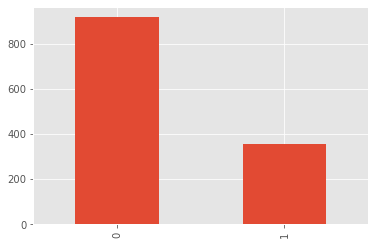

In [30]:
data["Ips"].value_counts().plot(kind="bar")

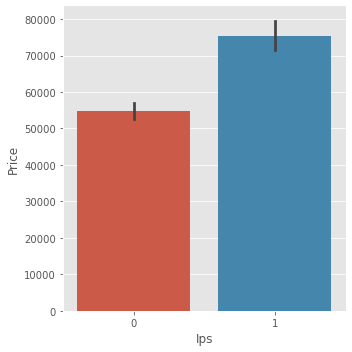

In [31]:
sns.catplot(x="Ips",y="Price",data=data,kind="bar")

In [32]:
new=data["ScreenResolution"].str.split("x",n=1,expand=True)

In [33]:
data['X_res']=new[0]
data['Y_res']=new[1]

In [34]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
data["X_res"]=data['X_res'].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
data["X_res"]=data["X_res"].astype("int32")
data["Y_res"]=data["Y_res"].astype("int32")

In [37]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  Ips               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


<AxesSubplot:>

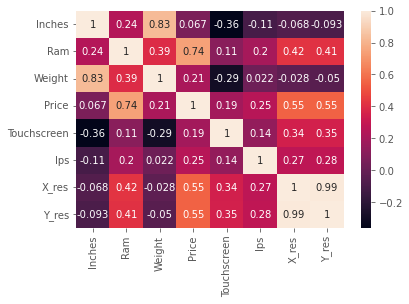

In [39]:
# Correlation matrix:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [40]:
# Make the PPI(Pixel Per Inches) columns:
data["ppi"]=((data["X_res"]**2) + (data["Y_res"]**2))**0.5/data["Inches"].astype("float")

<AxesSubplot:>

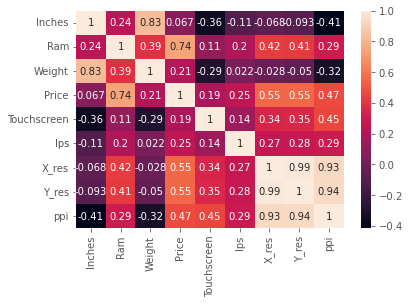

In [41]:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [42]:
# So I have a ppi column so drop the Inches,ScreenResolution,X_res,Y_res columns.
data.drop(columns=["Inches","ScreenResolution","X_res","Y_res"],inplace=True)

In [43]:
data.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624


In [44]:
data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [45]:
data["Cpu_name"]=data["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
data.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7


In [47]:
def get_processor(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"
    

In [48]:
data["Cpu_brand"]=data["Cpu_name"].apply(get_processor)

<AxesSubplot:>

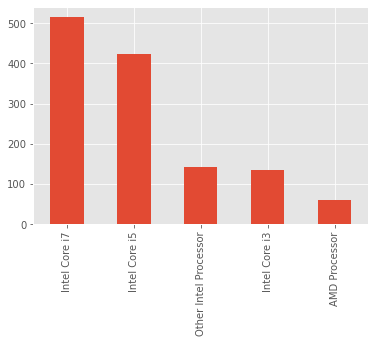

In [49]:
data["Cpu_brand"].value_counts().plot(kind="bar")

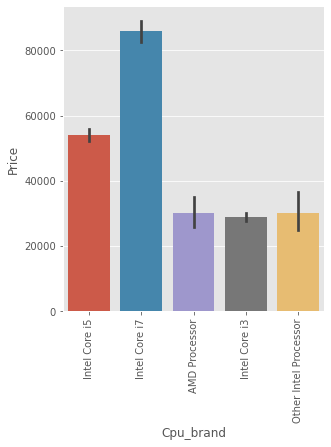

In [50]:
sns.catplot(x="Cpu_brand",y="Price",data=data,kind="bar")
plt.xticks(rotation="vertical")
plt.show()

In [51]:
# Now drop the cpu and cpu_name columns:
data.drop(columns=["Cpu","Cpu_name"],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

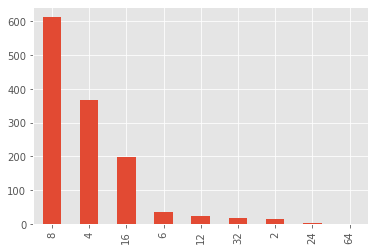

In [52]:
data["Ram"].value_counts().plot(kind="bar")

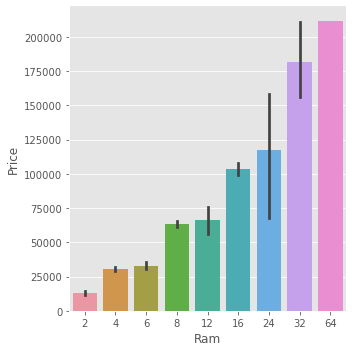

In [53]:
sns.catplot(x="Ram",y="Price",data=data,kind="bar")

In [54]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\2300112342.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_23808\2300112342.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [55]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [56]:
data["HDD"].value_counts()

0       715
1000    400
500     125
2000     32
32        1
128       1
Name: HDD, dtype: int64

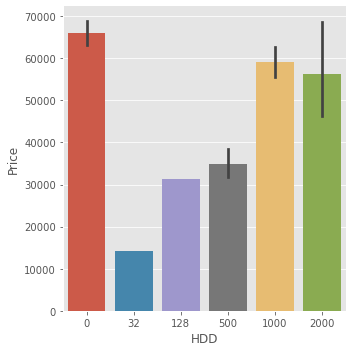

In [57]:
sns.catplot(x="HDD",y="Price",data=data,kind="bar")

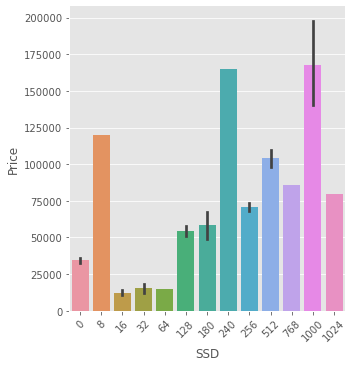

In [58]:
sns.catplot(x="SSD",y="Price",data=data,kind="bar")
plt.xticks(rotation="45")
plt.show()

In [59]:
data.corr()["Price"]

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
Ips              0.250358
ppi              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [60]:
data.drop(columns=["Hybrid","Flash_Storage","Memory"],inplace=True)

In [61]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [62]:
data["Gpu_brand"]=data["Gpu"].apply(lambda x:x.split()[0])

In [63]:
data["Gpu_brand"].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu_brand, dtype: int64

In [64]:
data=data[data["Gpu_brand"]!="ARM"]

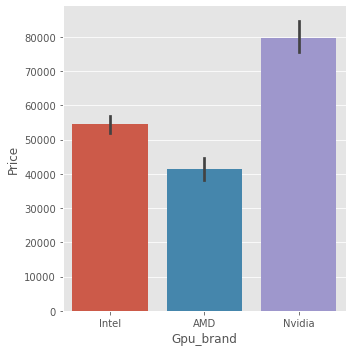

In [65]:
sns.catplot(x="Gpu_brand",y="Price",data=data,kind="bar")

In [66]:
data.drop(columns=["Gpu"],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\4249377748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Gpu"],inplace=True)


In [67]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [68]:
data["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [69]:
def categ_os(os):
    if os=="Windows 10" or os=="Windows 7" or os=="Windows 10 S":
        return 'Windows'
    elif os=="macOS" or os=="MAC OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"

In [70]:
data["Os"]=data["OpSys"].apply(categ_os)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\861918738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Os"]=data["OpSys"].apply(categ_os)


In [71]:
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
947,Lenovo,Notebook,8,No OS,2.20,36496.8000,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Others/No OS/Linux
356,Lenovo,Notebook,4,No OS,2.20,17155.6272,0,0,100.454670,Other Intel Processor,1000,0,Intel,Others/No OS/Linux
279,Lenovo,Notebook,8,No OS,2.80,45234.7200,0,0,127.335675,Intel Core i7,2000,0,Nvidia,Others/No OS/Linux
1175,Asus,Notebook,4,Windows 10,2.00,40972.3200,0,0,157.350512,Intel Core i3,0,256,Intel,Windows
518,HP,Notebook,8,Windows 10,2.04,47365.9200,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows


In [72]:
data.drop(columns=["OpSys"],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\1051997541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["OpSys"],inplace=True)


In [73]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


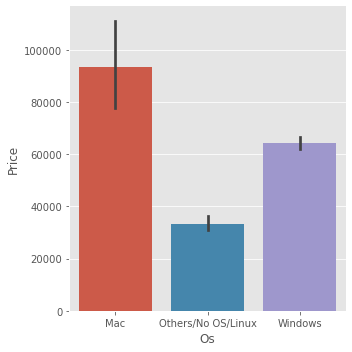

In [74]:
sns.catplot(x="Os",y="Price",data=data,kind="bar")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

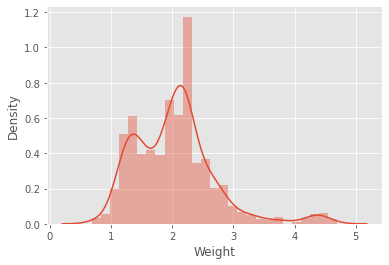

In [75]:
sns.distplot(data["Weight"])

In [76]:
data.corr()["Price"]

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
Ips            0.251514
ppi            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<AxesSubplot:>

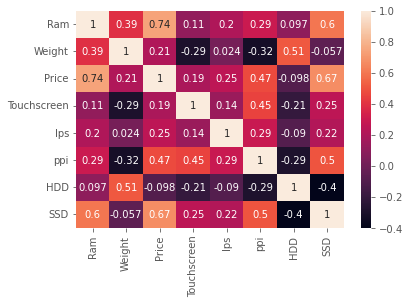

In [77]:
sns.heatmap(data.corr(),annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

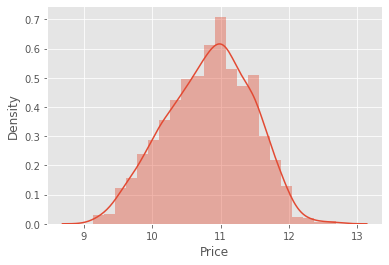

In [78]:
# Apply the log on the price to make its symmetrical.
sns.distplot(np.log(data["Price"]))

In [79]:
X=data.drop("Price",axis=1)
y=np.log(data["Price"])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [82]:
x_train.shape

(1082, 12)

In [83]:
x_test.shape

(191, 12)

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [86]:
transf=ColumnTransformer(transformers=[
    ("cols_trans",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder="passthrough")

In [87]:
x_train1=transf.fit_transform(x_train)
x_test1=transf.transform(x_test)

# Apply Linear Regression:

In [88]:
model1=LinearRegression()
model1.fit(x_train1,y_train)

LinearRegression()

In [89]:
y_pred=model1.predict(x_test1)
model1.score(x_test1,y_test)

0.8275070696923895

In [90]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8275070696923895
MAE 0.21081256978258456


In [91]:
np.exp(0.22)

1.2460767305873808

# Apply KNeighborsRegressor

In [92]:
model2=KNeighborsRegressor()
model2.fit(x_train1,y_train)

KNeighborsRegressor()

In [93]:
y_pred=model2.predict(x_test1)
model2.score(x_test1,y_test)

0.7453136619627146

In [94]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.7453136619627146
MAE 0.23393583817760588


# Apply DecisionTreeRegressor

In [95]:
model3=DecisionTreeRegressor(max_depth=10)

In [96]:
model3.fit(x_train1,y_train)

DecisionTreeRegressor(max_depth=10)

In [97]:
y_pred=model3.predict(x_test1)
model3.score(x_test1,y_test)

0.7902529722428221

In [98]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.7902529722428221
MAE 0.22376109090648466


# Apply RandomForestRegressor

In [99]:
model5=RandomForestRegressor(n_estimators=35,random_state=3,max_samples=0.5,max_features=0.75,max_depth=20)

In [100]:
model5.fit(x_train1,y_train)

RandomForestRegressor(max_depth=20, max_features=0.75, max_samples=0.5,
                      n_estimators=35, random_state=3)

In [101]:
y_pred=model5.predict(x_test1)
model5.score(x_test1,y_test)

0.8540414979310712

In [102]:
print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8540414979310712
MAE 0.1845486440516164


In [103]:
#comp.drop("Company",axis=1)
#comp.set_index(data["Company"],inplace=True)

In [104]:
l=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','t0','t1','t2','t3',
   't4','cpu0','cpu1','cpu2','cpu3','gpu0','gpu1','os0','os1','Ram','Weight','Touchscreen','Ips','ppi','HDD','SSD']

In [105]:
c=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17']

In [106]:
x_train2=pd.DataFrame(x_train1,columns=l)
x_train2.head(3)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,gpu1,os0,os1,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,32.0,4.42,0.0,1.0,127.335675,1000.0,256.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.86,0.0,0.0,100.454670,0.0,256.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.60,0.0,0.0,117.826530,0.0,128.0


In [107]:
x_test2=pd.DataFrame(x_test1,columns=l)

In [108]:
type_lap=x_train2[['t0','t1','t2','t3','t4']]
type_lap.set_index(x_train["TypeName"],inplace=True)
type_lap.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\1520558044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_lap.drop_duplicates(inplace=True)


In [109]:
data.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [110]:
cpu_typ=x_train2[['cpu0','cpu1','cpu2','cpu3']]
cpu_typ.set_index(x_train["Cpu_brand"],inplace=True)
cpu_typ.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\1072983181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_typ.drop_duplicates(inplace=True)


In [111]:
gpu_typ=x_train2[['gpu0','gpu1']]
gpu_typ.set_index(x_train["Gpu_brand"],inplace=True)
gpu_typ.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\3983380317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_typ.drop_duplicates(inplace=True)


In [112]:
os2=x_train2[['os0','os1']]
os2.set_index(x_train["Os"],inplace=True)
os2.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23808\3343254726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os2.drop_duplicates(inplace=True)


In [113]:
oh=OneHotEncoder(sparse=False,drop="first")

In [114]:
a2=oh.fit_transform(x_train[["Company"]])
comp=pd.DataFrame(a2,columns=c,index=x_train["Company"])
comp.drop_duplicates()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17
Company,,,,,,,,,,,,,,,,,,
Dell,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Asus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lenovo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toshiba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Apple,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fujitsu,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
x_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
144,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,0,256,AMD,Windows


In [116]:
d={"Ram":[2],"Weight":[4],"Touchscreen":[12],"lps":[0],"ppi":[5],"HDD":[4],"SSD":[13]}
r1=pd.DataFrame(d)
r1

,Ram,Weight,Touchscreen,lps,ppi,HDD,SSD
0,2,4,12,0,5,4,13


In [117]:
def convert_ppi(p,inches):
    p=pd.DataFrame([[p]])
    new=p[0].str.split("x",n=1,expand=True)
    p['X_res']=new[0]
    p['Y_res']=new[1]
    p["X_res"]=p['X_res'].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
    p["X_res"]=p["X_res"].astype("int32")
    p["Y_res"]=p["Y_res"].astype("int32")
    p["ppi"]=((p["X_res"]**2) + (p["Y_res"]**2))**0.5/inches
    pp1=p["ppi"].values[0]
    return pp1

In [118]:
def enter_info(com,typ,cp,gp,os1,rm,we,ts,lp,pp,hd,ss):
    a=comp.drop_duplicates()
    res1=a.loc[[com]]
    res1.reset_index(inplace=True)
    res1.drop(columns=["Company"],inplace=True)
    res2=type_lap.loc[[typ]]
    res2.reset_index(inplace=True)
    res2.drop(columns=["TypeName"],inplace=True)
    res3=cpu_typ.loc[[cp]]
    res3.reset_index(inplace=True)
    res3.drop(columns=["Cpu_brand"],inplace=True)
    res4=gpu_typ.loc[[gp]]
    res4.reset_index(inplace=True)
    res4.drop(columns=["Gpu_brand"],inplace=True)
    res5=os2.loc[[os1]]
    res5.reset_index(inplace=True)
    res5.drop(columns=["Os"],inplace=True)
    d={"Ram":[rm],"Weight":[we],"Touchscreen":[ts],"lps":[lp],"ppi":[pp],"HDD":[hd],"SSD":[ss]}
    r1=pd.DataFrame(d)
    r1
    res=pd.concat([res1,res2,res3,res4,res5,r1],axis=1)
    return res

In [119]:
x_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
144,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,0,256,AMD,Windows


# Check the Price of any Laptop

In [120]:
x=convert_ppi("1920x1080",15.6)
x

141.21199808219862

In [121]:
a11=enter_info("Lenovo","Gaming","Intel Core i5","Nvidia","Windows",8,2.3,0,1,x,0,512)
a11

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,gpu1,os0,os1,Ram,Weight,Touchscreen,lps,ppi,HDD,SSD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,8,2.3,0,1,141.211998,0,512


In [122]:
y1=model5.predict(a11)
price=np.exp(y1)
print("The Price of the laptop is ",price[0])

The Price of the laptop is  59254.98073521027


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [123]:
x_train2.head(3)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,gpu1,os0,os1,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,32.0,4.42,0.0,1.0,127.335675,1000.0,256.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.86,0.0,0.0,100.454670,0.0,256.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.60,0.0,0.0,117.826530,0.0,128.0


In [125]:
company=input("Enter any Company: ")
Type=input("Enter type of Laptop: ")
cpu=input("Enter the Cpu_brand :")
gpu=input("Enter the Gpu_brand :")
os=input("Enter the Operating System :")
ram=int(input("Enter Ram :"))
weight=float(input("Enter the weight :"))
Ts=int(input("Enter 1 if TouchScreen or 0 if not TouchScreen :"))
ip=int(input("Enter 1 if IPS Panel Retina Display is present otherwise 0 :"))
res=input("Enter the Resolution :")
inch=float(input("Enter the Inches :"))
hdd=int(input("Enter HDD :"))
ssd=int(input("Enter SSD :"))
ppi=convert_ppi(res,inch)
a11=enter_info(company,Type,cpu,gpu,os,ram,weight,Ts,ip,ppi,hdd,ssd)
a11

Enter any Company: Asus
Enter type of Laptop: Gaming
Enter the Cpu_brand :AMD Processor
Enter the Gpu_brand :Nvidia
Enter the Operating System :Windows
Enter Ram :16
Enter the weight :2.1
Enter 1 if TouchScreen or 0 if not TouchScreen :0
Enter 1 if IPS Panel Retina Display is present otherwise 0 :1
Enter the Resolution :1920x1080
Enter the Inches :15.6
Enter HDD :0
Enter SSD :1000


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,gpu1,os0,os1,Ram,Weight,Touchscreen,lps,ppi,HDD,SSD
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,16,2.1,0,1,141.211998,0,1000


# Here Take a one example of Asus laptop whose Actual price is 85990.

In [127]:
# Price by Linear Regression Model:
y1=model1.predict(a11)
price=np.exp(y1)
print("The Price of the laptop is ",price[0])

The Price of the laptop is  78337.05853635514


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [129]:
# Price by KNeighbors Regressor Model:
y1=model2.predict(a11)
price=np.exp(y1)
print("The Price of the laptop is ",price[0])

The Price of the laptop is  131824.04608779412


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [130]:
# Price by Decision Tree Regressor Model:
y1=model3.predict(a11)
price=np.exp(y1)
print("The Price of the laptop is ",price[0])

The Price of the laptop is  94253.00773865553


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [128]:
# Price by Random Forest Regressor Model:
y1=model5.predict(a11)
price=np.exp(y1)
print("The Price of the laptop is ",price[0])

The Price of the laptop is  101531.68056706488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
